In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df = pd.read_csv('data/Bengaluru_House_Data.csv')

In [3]:
df.sample(5)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
3693,Built-up Area,Ready To Move,Babusapalaya,3 BHK,NaN,1453,2.0,2.0,43.59
5263,Super built-up Area,Ready To Move,Amruthahalli,3 BHK,NaN,1350,2.0,3.0,63.00
4019,Plot Area,Ready To Move,Yelachenahalli,5 Bedroom,NaN,897,2.0,1.0,85.00
12325,Super built-up Area,Ready To Move,LIC Colony,2 BHK,NaN,1200,2.0,1.0,115.00
3409,Super built-up Area,Ready To Move,Indira Nagar 3rd Stage,3 BHK,NaN,1740,3.0,2.0,199.00


In [4]:
df.shape

(13320, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
#percentage missing in cols
(df.isnull().sum() / df.shape[0]) * 100

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [8]:
#since society have 41% missing value so this feature will get droped
df.drop(columns=['society'],inplace=True)

In [9]:
#checking unique values in all columns
df.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [10]:
for cols in df.columns:
    print((df[cols].value_counts()/df.shape[0])*100)

area_type
Super built-up  Area    65.990991
Built-up  Area          18.153153
Plot  Area              15.202703
Carpet  Area             0.653153
Name: count, dtype: float64
availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64
location
Whitefield                        4.054054
Sarjapur  Road                    2.995495
Electronic City                   2.267267
Kanakpura Road                    2.049550
Thanisandra                       1.756757
                                    ...   
Bapuji Layout                     0.007508
1st Stage Radha Krishna Layout    0.007508
BEML Layout 5th stage             0.007508
singapura paradise                0.007508
Abshot Layout                     0.0

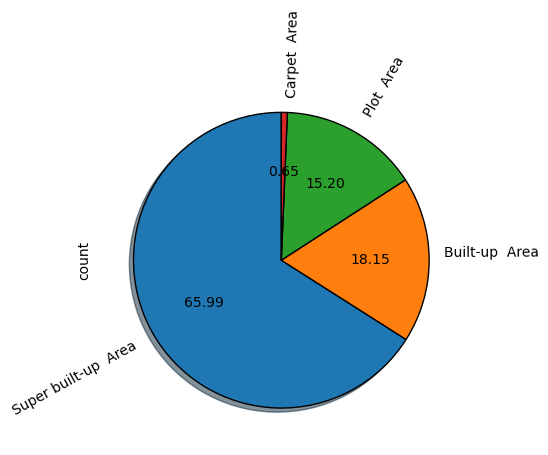

In [11]:
df['area_type'].value_counts().plot.pie(autopct='%.2f',shadow=True,startangle=90,wedgeprops={'edgecolor':'black'},rotatelabels=True)
plt.show()

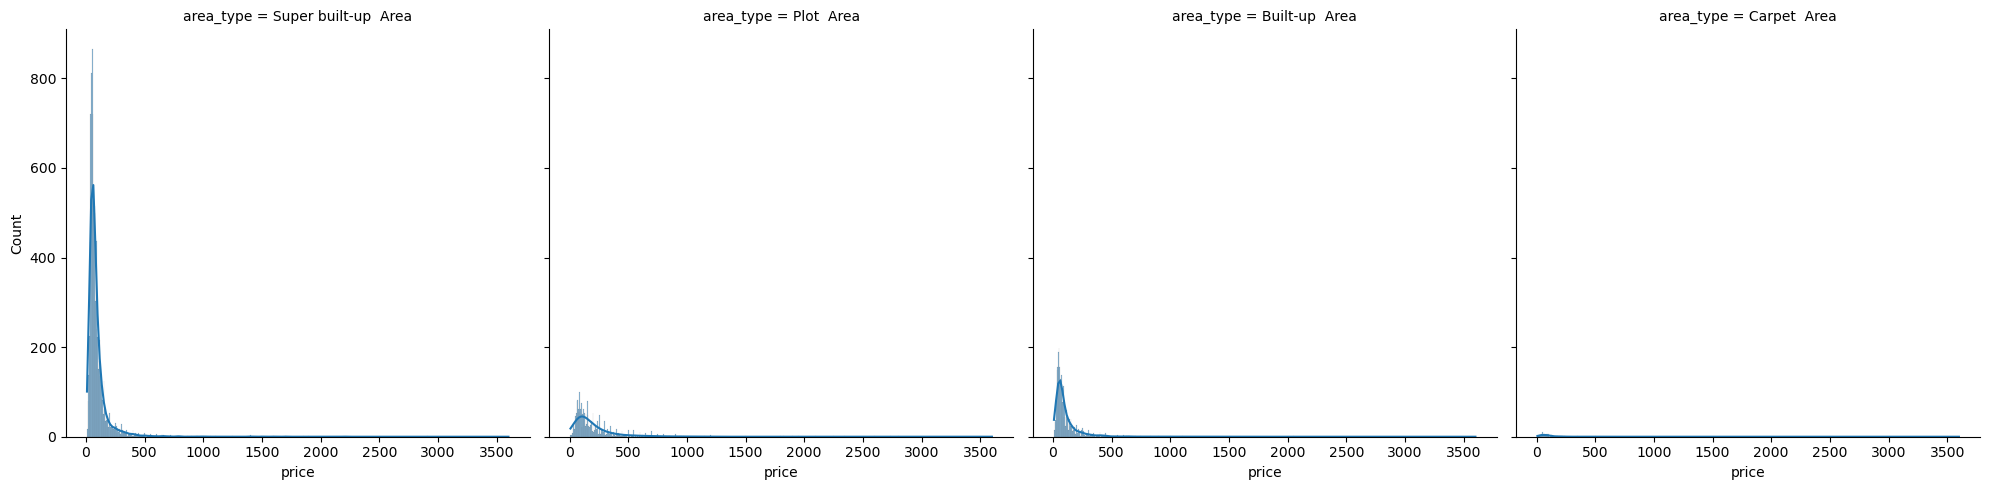

In [12]:
sns.displot(df, x="price", col="area_type", kde=True, col_wrap=4)
plt.show()

In [13]:
# area_type have 4 categories out of which one is 66% and also probablity density function of
# all four category is almost same so droping this feature
df.drop(columns=['area_type'],inplace=True)

In [14]:
(df['availability'].value_counts()/df.shape[0])*100

availability
Ready To Move    79.436937
18-Dec            2.304805
18-May            2.214715
18-Apr            2.034535
18-Aug            1.501502
                   ...    
15-Aug            0.007508
17-Jan            0.007508
16-Nov            0.007508
16-Jan            0.007508
14-Jul            0.007508
Name: count, Length: 81, dtype: float64

In [15]:
# availability have 81 categories but one value is around 80% so this feature is not usefull
df.drop(columns=['availability'],inplace=True)

In [16]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
4128,Panduranga Nagar,3 BHK,1827,3.0,3.0,100.0
2031,Sir M V Nagar,7 Bedroom,4400,9.0,NaN,120.0
5740,1st Block HRBR Layout,3 Bedroom,600,3.0,1.0,90.0


In [17]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [18]:
df['location'].isna().sum()

1

In [19]:
#filling missing value with mode
df['location'] = df['location'].fillna('Whitefield')

In [20]:
df['location'].nunique()

1305

In [22]:
location_counts = df['location'].value_counts()

In [23]:
len(location_counts[location_counts<=10])

1064

In [24]:
len(location_counts[location_counts>10])

241

In [25]:
# There are 1064 locations with 10 or fewer occurrences.
# To reduce the number of unique categories, these locations will be grouped under a new category named "other".
df['location'] = df['location'].apply(lambda x:'other' if location_counts[x]<=10 else x)

In [27]:
df['location'].nunique()

242

now there are only 242 categories 

In [28]:
df.sample(3)

,location,size,total_sqft,bath,balcony,price
13236,JP Nagar,2 BHK,1048,2.0,1.0,44.0
1788,Electronic City,3 BHK,1360,2.0,1.0,75.0
8583,Badavala Nagar,3 BHK,1842,3.0,2.0,115.0
